# Introduction 

This is Udacity's data wrangling project. This aim of this project is to gather data from differnt sources, identify the issues with data, and then clean up it. 

Lastly, the clean data is used to draw insights. 

## Gather data from different sources

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests 
import tweepy
import json
import io
from tweepy import OAuthHandler
from timeit import default_timer as timer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import datetime

### Source 1. CSV file

In [2]:
#read in the WeRateDogs twitter archieve into a pandas dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Check if the data frame looks ok
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Source 2: Image prediction file from Udacity

In [4]:
#Programmatically download the Image Prediction files from the Udacity Website 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [5]:
#Read the the downloaded file into a pandas dataframe 
url_data = response.content
df_ip = pd.read_csv(io.StringIO(url_data.decode('utf-8')),sep ='\t')
df_ip.to_csv('twitter_archive_master.csv')

In [6]:
#Check the dataframe
df_ip.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Source 3. Twitter APIs

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
#Read the data from the twitter-json text file
df_list = []

with open('tweet-json.txt','r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']

        # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': favorite_count})
        #create a pandas dataframe
        df_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

#Check the dataframe
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<br>
<br>
<br>

## Data Assessment 

In this part of the project, I will look at the three data frames one by one

### Twitter archieve enhanced (df) assessment

In [8]:
#First lets look at the data types and the amount of data in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#Look at the numerical values
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


<font color='blue'>__Observation:__There are outliers in the rating_numerator and the rating_denominator, let's sort them to figure out what these are <font>

In [10]:
#Look at the values of the rating denominator that are higher than 10 
df.sort_values(by='rating_denominator', ascending=False).head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


<font color='blue'> The ratings are supposed to be out of 10, however, we find that there are several values >10, and also, there are rating_denominator values lower than 10. 
    Let's inspect the text for rating_denominator values != 10. 

In [11]:
pd.set_option('display.max_colwidth', -1)

In [12]:
df_temp = df[(df['rating_denominator'] != 10)]
df_temp.text

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

<font color='blue'> Inspecting the text for the rating_denominator values not equal to 10, we find an interesting trends
    1. Entries 313, 342 are not for dogs. They are just tweets 
    2. Several entries are for multiple dogs, and not single dogs
    3. 784 and 1068 are entries for the same dog. 
    4. Entry 2335 should be 9/10 not 1/2
    5. Entry 1662 should be 10/10
    6. Entry 1202 should be 11/10 not 50/50
    7. Entry 784 should be 14/10
    8. 516 has no rating 

<font>

In [13]:
#We can do the same with the numerator
np.sort(df.rating_numerator.unique())


array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

__Here we see that there are several values of the numerator lower than 10, which should not be the case, also, there are some very high values.__ 

In [14]:
#Check for duplicated values
df.duplicated(subset=None, keep='first').unique()

array([False])

In [15]:
#There seem to be some names in the 'name' column, which are not actualy names. 
#These also appear to be lower case. 
#Let's sort the dataframe by decending order, to get the lower case names first and see if that is the case
df['name'].sort_values(ascending = False)


1385    very        
819     very        
1097    very        
773     very        
1031    very        
1121    unacceptable
1120    this        
1527    the         
1797    the         
1815    the         
2212    the         
2037    the         
1603    the         
2346    the         
2345    the         
22      such        
2030    space       
193     quite       
118     quite       
169     quite       
2326    quite       
369     one         
924     one         
1936    one         
993     one         
1206    old         
1747    officially  
335     not         
988     not         
852     my          
        ..          
2195    Amélie      
2078    Amy         
1334    Ambrose     
1495    Amber       
1701    Alice       
201     Alice       
51      Alfy        
858     Alfie       
1616    Alfie       
367     Alfie       
661     Alfie       
2238    Alfie       
486     Alf         
1189    Alexanderson
374     Alexander   
2046    Alejandro   
1115    Aldri

It appears that there are a few rows with entries in the name columns that are not names 

### Images dataframe (df_ip) assessment

Let's look at the Image dataframe 

In [16]:
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


__Issues__
1. There is no column that mentions what's the most probable breed of dog
2. No column that mentions if it is a dog or not 



In [17]:
#Check for duplicated values in images dataframe
df_ip.duplicated(subset=None, keep='first').unique()

array([False])

### Assess the tweets (df_tweets) dataframe

In [18]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
#Check for duplicates
df_tweets.duplicated(subset=None, keep='first').unique()

array([False])

<br>
<br>

## Issues in the data

### Quality

__IN df__
   1. Missing dog names 
   2. None instead of NaN in dog names 
   3. Missing stages of the dog
   4. The text does not follow a fixed format. This makes it difficult to extract the dog name from the text.
   5. Entries 313, 342 are not for dogs. They are just tweets 
   6. Several entries are for multiple dogs, and not single dogs
   7. 764 and 1068 are entries for the same dog. 
   8. Entry 2335 should be 9/10 not 1/2
   9. Entry 1662 should be 10/10
   10. Entry 1202 should be 11/10 not 50/50
   11. Enry 784 should be 14/10
   12. 516 has no rating 
   13. Some of the entries in the numerator are too high
   14. Datatype for timestamp is incorrect
   15. In the dog stages, we are missing blep and floofer
        
   
__In df_ip__
   1. Missing a column that mentions which species of dog is it 
   2. There are rows where the image is not that of a dog. 
   
   
### Tidiness

1. There are 4 columns for dog stages, we just need one
2. The three dataframes need to be combined

<br>
<br>

## Cleanup

In [47]:
#make copies of the dataframes to work with 
df_clean = df.copy()
df_ip_clean = df_ip.copy()
df_tweets_clean = df_tweets.copy()

### Cleanup of the twitter dogs (df) dataframe 

__Define__
1. Extract all the stages of the dogs, including the missing blep and snoot, and put them into a column
2. Drop the columns for the dog stages 
3. Drop the retweeted columns

__Code__

In [48]:
#The best way to combine the stages columns is to create a new column and just extract specific words 
#that define the stages from the text. 
#Moreover, we can add the stages BLEP and SNOOT which are currently not present
#This also takes care of the nones and automatically adds NaNs where there is nothing 
#df_clean['stage'] = df_clean['text'].str.extract('(puppo|doggo|pupper|floofer|blep|snoot)',expand = True)

#Make a column for stage 'blep'
df_clean['blep'] = df_clean['text'].str.extract('(blep)',expand = True)



In [49]:
#Drop the None and nans (in the blep column) and replace with empty space to later combine the columns
list_stage = ['doggo','floofer','pupper','puppo']
for i in list_stage:
        df_clean[i] = df_clean[i].replace('None', '')

df_clean['blep'].fillna('',inplace=True)


In [50]:
#Concatenate the five columns for stages
df_clean['stage'] = df_clean.doggo.str.cat(df_clean.floofer).str.cat(df_clean.pupper).str.cat(df_clean.puppo).str.cat(df_clean.blep)


In [51]:
#Check the values in the stages column
df_clean.stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'blep', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [52]:
#replace entries that have multiple stages with multiple
df_clean['stage'] = df_clean['stage'].replace('doggopuppo', 'multiple')
df_clean['stage'] = df_clean['stage'].replace('doggofloofer', 'multiple')
df_clean['stage'] = df_clean['stage'].replace('doggopupper', 'multiple')

In [53]:
df_clean.stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'blep', 'multiple'],
      dtype=object)

In [54]:
#Replace space with NaN in the stages
df_clean['stage'] = df_clean['stage'].replace('', np.nan)

#Drop the five different columns on stages
df_clean = df_clean.drop(columns = ['doggo','floofer','pupper','puppo','blep'])

__Test__

In [55]:
df_clean.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'blep', 'multiple'],
      dtype=object)

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         381 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
blep                          23

In [38]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,blep,snoot
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,,,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,,,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,,,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,,,,,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,,,,,NaN


__Define__

Drop the retweeted rows and then the columns

__Code__

In [58]:
#Drop the retweeted rows
df_clean = df_clean[pd.isnull(df_clean['retweeted_status_id'])]


In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         345 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


In [61]:
df_clean = df_clean.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])


__Test__

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    345 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


Here we see that
1. We have drop the unnecessary columns
2. have a single column for the dog stage 
3. have included blep in the stage 
4. Replaced the none with nan 

### Name cleanup

There are lower case instances of the names, where the entries in the name columns are not actually names. 

In [64]:
#Create a sub data frame that consists only of the lowercase entries in the names column
df_clean_name = df_clean.loc[(df_clean['name'].str.islower())]
df_clean_name

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,pupper
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,NaN
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK","https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,NaN
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,NaN
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,

__Define__

__Based on the table above, we can make the following assessment__

For the dogs with lowercase names (or not names), we have some dogs whose names are given in the following way 

1. Preceded by named
2. Preceded by name is

For extracting the names based on the above conditions, we will 
1. Make two arrays with the indices of text that contain 
    1. named
    2. name is 
2. Extract the names 
3. Append these names to the dataframe 

__Code__

In [65]:
#Create a list for text containing "named"
named = df_clean.loc[(df_clean['name'].str.islower()) & df_clean['text'].str.contains('named')]
list_named = list(named.index.values)

#Create a list for text containing "name is"
name_is = df_clean.loc[(df_clean['name'].str.islower()) & df_clean['text'].str.contains('name is')]
list_name_is = list(name_is.index.values)

#Make a list that has no names in text
no_name = df_clean.loc[(df_clean['name'].str.islower())]
list_no_name = list(no_name.index.values)

In [66]:
#drop the indices from the no_name list which are in the named and name_list 
list_no_name = [x for x in list_no_name if x not in list_named]
list_no_name = [x for x in list_no_name if x not in list_name_is]

In [67]:
#Check the text
named.text[list_named[0]]

"This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI"

In [68]:
list_named

[1853,
 1955,
 2034,
 2066,
 2116,
 2125,
 2128,
 2146,
 2161,
 2191,
 2204,
 2218,
 2235,
 2249,
 2255,
 2264,
 2273,
 2304,
 2311,
 2314]

In [69]:
list_name_is

[852, 2287]

In [70]:
list_no_name

[22,
 56,
 169,
 193,
 335,
 369,
 542,
 649,
 801,
 819,
 924,
 988,
 992,
 993,
 1002,
 1004,
 1017,
 1025,
 1031,
 1040,
 1049,
 1063,
 1071,
 1095,
 1097,
 1120,
 1121,
 1138,
 1193,
 1206,
 1207,
 1259,
 1340,
 1351,
 1361,
 1362,
 1368,
 1382,
 1385,
 1435,
 1457,
 1499,
 1527,
 1603,
 1693,
 1724,
 1737,
 1747,
 1785,
 1797,
 1815,
 1854,
 1877,
 1878,
 1916,
 1923,
 1936,
 1941,
 1994,
 2001,
 2019,
 2030,
 2037,
 2153,
 2198,
 2211,
 2212,
 2222,
 2326,
 2327,
 2333,
 2334,
 2335,
 2345,
 2346,
 2347,
 2348,
 2349,
 2350,
 2352,
 2353,
 2354]

In [71]:
import re
#loop through the list
for i in list_named:
    string = named.text[i]
    #find the name for string containing named
    name = re.findall(r"named\s(\w+)", string)
    name = ''.join(name)
    #add the name to dataframe
    df_clean.name[i] = name
    print(df_clean.name[i])
    #print(name)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Leroi
Berta
Chuk
Alfonso
Cheryl
Jessiga
Klint
Kohl
Pepe
Octaviath
Johm


In [72]:
for j in list_name_is:
    #find the name in the string that contains name is
    string_2 = name_is.text[j]
    name_2 = re.findall(r"name is\s(\w+)", string_2)
    name_2 = ''.join(name_2)
    #add the name to dataframe
    df_clean.name[j] = name_2
    print(df_clean.name[j])

Zoey
Daryl


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [73]:
for k in list_no_name: 
    #change the remaining lower cased not names to NaN
    df_clean.name[k] = np.NaN


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


__Test__

Check if the names have been updated 

In [74]:
df_clean.name[list_name_is]

852     Zoey 
2287    Daryl
Name: name, dtype: object

In [75]:
df_clean.name[list_named]

1853    Wylie    
1955    Kip      
2034    Jacob    
2066    Rufus    
2116    Spork    
2125    Cherokee 
2128    Hemry    
2146    Alphred  
2161    Alfredo  
2191    Leroi    
2204    Berta    
2218    Chuk     
2235    Alfonso  
2249    Cheryl   
2255    Jessiga  
2264    Klint    
2273    Kohl     
2304    Pepe     
2311    Octaviath
2314    Johm     
Name: name, dtype: object

In [76]:
#Check that only nan's are there in this condition
df_clean.name[list_no_name].unique()


array([nan], dtype=object)

__Define__

Replace None with NaN in the name column

__Code__

In [77]:
#replace None in the dataframe with nan
df_clean['name'].replace('None', np.nan, inplace=True)

__Test__

In [78]:
df_clean.name.str.islower().unique()

array([False, nan], dtype=object)

__We have successfully__
1. Removed the lower case non names
2. Added names where possible
3. Changed None to NaN

In [79]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


<br>
<br>
<br>

### Ratings cleanup

__Define__ 

Let's look at the dataset again where the denominator != 10, and systematically address the issues


There are several issues with the denominator when we looked at the dataframe.


In [80]:
df_clean_2 = df_clean.copy()

In [81]:
pd.set_option('display.max_colwidth', -1)
df_temp = df_clean_2[(df_clean_2['rating_denominator'] != 10)]
df_temp.text

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second e

__Define__

The following ratings 313,1068, 1165,1202,1662,2335 have a slash before the actual rating out of 10, for example, 7/11, 24/7 etc. 

We will make a list of these indices and then find the number before /10

__CODE__

In [84]:
list_den = [313,1068, 1165,1202,1662,2335]

In [85]:
#Assign the correct numerator and denominator
for i in list_den:
    words = df_temp.text[i]
    rate_d = re.findall(r"\s(\w+)/10", words)
    #convert rate d to string
    rate_d = ''.join(rate_d)
    num = df_clean_2.rating_numerator[i]
    
    #Assign the new numerator
    df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(num, int(rate_d))
    #df_clean.rating_denominator[i] = rate_d
    #Assign correct denominator
    den = df_clean_2.rating_denominator[i]
    df_clean_2.rating_denominator = df_clean_2.rating_denominator.replace(den, 10)

__Check__

In [86]:
#denominator
df_clean_2.rating_denominator[list_den]

313     10
1068    10
1165    10
1202    10
1662    10
2335    10
Name: rating_denominator, dtype: int64

In [87]:
#numerator
df_clean_2.rating_numerator[list_den]

313     13
1068    14
1165    13
1202    11
1662    10
2335    9 
Name: rating_numerator, dtype: int64

__Define__

There are still entries that have multiple ratings together. Since these are for multiple dogs, we can easily get these ratings out of 10 by dividing the denominator by 10, and then divding the numerator by the resulting quotient 

For example, in a rating of 84/70, we divide 70 by 10 to get 7, and then divide 84 by 7 to get 12 for a final numerator of 12 and denominator for 10 (which we can set). 

__Code__

In [88]:
#Get the new list 
#We will first get the list of all the indices, and then drop the indices where we have already fixed the ratings 
list_den_2 = list(df_temp.index.values)
list_den_2 = [x for x in list_den_2 if x not in list_den]

#There are 5 entries that do not have valid ratings, we will drop these too 
list_invalid_rating = [342,516,1068,1598,1663]
list_den_2 = [x for x in list_den_2 if x not in list_invalid_rating]
print(list_den_2)


[433, 902, 1120, 1228, 1254, 1274, 1351, 1433, 1634, 1635, 1779, 1843]


In [89]:
for j in list_den_2:
    new_numerator = df_clean_2.rating_numerator[j]/(df_clean_2.rating_denominator[j]/10)
    
    num = df_clean_2.rating_numerator[j]
    
    #Assign the new numerator
    df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(num, new_numerator)
    print(j,df_clean_2.rating_numerator[j])
    
    #Assign correct denominator
    den = df_clean_2.rating_denominator[j]
    df_clean_2.rating_denominator = df_clean_2.rating_denominator.replace(den, 10)

433 12
902 11
1120 12
1228 11
1254 10
1274 45
1351 60
1433 11
1634 11
1635 11
1779 12
1843 88


In three of the cases, 1274, 1351, and 1843 we see that the numerators did not change, and that is because in these cases, the denominator was already 10. Since, it is only two cases, we can just fix these individually 

In [90]:
df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(df_clean_2.rating_numerator[1274], 9)
df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(df_clean_2.rating_numerator[1351], 12)
df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(df_clean_2.rating_numerator[1843], 11)


__Test__

In [91]:
df_clean_2.rating_numerator[list_den_2]

433     12
902     11
1120    12
1228    11
1254    10
1274    9 
1351    12
1433    11
1634    11
1635    11
1779    12
1843    11
Name: rating_numerator, dtype: int64

In [92]:
df_clean_2.rating_denominator[list_den_2]

433     10
902     10
1120    10
1228    10
1254    10
1274    10
1351    10
1433    10
1634    10
1635    10
1779    10
1843    10
Name: rating_denominator, dtype: int64

In [93]:
#Lets do a check for really high ratings, in this case we will take 20,
#because most ratings are between 9 and 15

df_num_temp = df_clean_2[(df_clean_2['rating_numerator'] >20)]
df_num_temp['text']


188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
290     @markhoppus 182/10                                                                                                                                                       
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                         
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at th

In [94]:
#Also, check for entries that have a decimal in the numerator
df_clean_2[df_clean_2.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


__Define__

<font color='blue'> Here we see that for the following indices [188,189,290,516,979,2074] are not actual ratings on , for example, 666, 420 and 1776. For the purpose of further analysis, it is best to drop this data. 

Also, incides [45,695,763,1698,1712] have a decimal in the numerator, and therefore throws off the rating. This needs to be fixed
    <font>

__Code__

In [95]:
df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(df_clean_2.rating_numerator[45], 13.5)
df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(df_clean_2.rating_numerator[695], 9.75)
df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(df_clean_2.rating_numerator[763], 11.27)
df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(df_clean_2.rating_numerator[1689], 9.5)
df_clean_2.rating_numerator = df_clean_2.rating_numerator.replace(df_clean_2.rating_numerator[1712], 11.26)


In [96]:
df_clean_2.shape

(2175, 11)

In [97]:
drop_list = [188,189,290,516,979,2074]

In [98]:
df_clean_2.drop(drop_list,inplace = True)

__Check__

In [99]:
df_clean_2.shape

(2169, 11)

In [100]:
df_num_temp = df_clean_2[(df_clean_2['rating_numerator'] >20)]
df_num_temp['text']

Series([], Name: text, dtype: object)

We have successfully cleaned the ratings of the dogs 
<br>
<br>

__Define__

Lastly for this dataframe, we will drop the rows that do not contain images

In [101]:
#Drop rows that do not contain images 
df_clean_2.dropna(subset=['expanded_urls'], inplace = True)

In [102]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2114 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2114 non-null object
source                   2114 non-null object
text                     2114 non-null object
expanded_urls            2114 non-null object
rating_numerator         2114 non-null float64
rating_denominator       2114 non-null int64
name                     1411 non-null object
stage                    339 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 198.2+ KB


### Cleanup the dogs images dataframe (df_ip)

__Now let's look at the dataframe with the probabilities of dog species__

Here one of the issues is that there are images that are not dog. We want to get rid of entries that are not dog

__Define__
1. We will first make a column that will determine if the image is that of a dog or not. This will look at the p_dogs colums and if one of the entries is true, it will assign a true value to that of the new column is_dog

2. Next we will drop all the rows that are not dogs because we only want to analyze the data on dogs. 

__Code__

In [103]:
#Add a column on determine if an image is a dog
df_ip_clean.loc[(df_ip_clean['p1_dog']==True)|(df_ip_clean['p2_dog']==True)|(df_ip_clean['p3_dog']==True), 'is_dog'] = True


In [104]:
df_ip_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,True


In [105]:
#keep only the rows that are dogs
df_ip_clean = df_ip_clean[df_ip_clean.is_dog == True]

__Test__

In [106]:
df_ip_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,True


__Define__

The dataset of dog species does not have a column for the dog species. We will create a column to address that 
1. We have already filtered the data based on the images that were dogs
2. However, not all the three options p1-p3 are dogs
3. We know that the p_values are p3<p2<p1. Therefore, if p3_dog == True, then we assign p3 to dog_specifies. However, if p3 is not dog, then we assign p2, and if both p3 and p3 are not dog, then we assign p1. 


__Code__

In [107]:
df_ip_clean.loc[(df_ip_clean['p3_dog']==True), 'dog_species'] = df_ip_clean['p3']
df_ip_clean.loc[(df_ip_clean['p3_dog']==False), 'dog_species'] = df_ip_clean['p2']
df_ip_clean.loc[(df_ip_clean['p3_dog']==False) & (df_ip_clean['p2_dog']==False), 'dog_species'] = df_ip_clean['p1']


__Check__

In [108]:
df_ip_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog,dog_species
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,Doberman
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,True,Greater_Swiss_Mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,True,Tibetan_mastiff
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,True,soft-coated_wheaten_terrier
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,True,Labrador_retriever


In the final analysis, we only care about the species of the dog, and not the probabilies and other possible species 

__Define__

Therefore, we will drop the probabilies, p_dog, and p1,p2 and p3 columns

We will also drop the is_dog column, we now we know that all the rows only have dogs


__Code__

In [109]:
df_ip_clean = df_ip_clean.drop(columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','is_dog'])


In [110]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id       1751 non-null int64
jpg_url        1751 non-null object
img_num        1751 non-null int64
dog_species    1751 non-null object
dtypes: int64(2), object(2)
memory usage: 148.4+ KB


### Merge the dataframes 

__Define__

Merge the three dataframes

__Code__

In [111]:
df_merge_clean = pd.merge(df_clean_2,df_ip_clean,how='inner', on=['tweet_id'])

__Test__

In [112]:
df_merge_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,dog_species
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,papillon
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,kelpie
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,German_short-haired_pointer
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Irish_terrier


In [113]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1684
Data columns (total 14 columns):
tweet_id                 1685 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1685 non-null object
source                   1685 non-null object
text                     1685 non-null object
expanded_urls            1685 non-null object
rating_numerator         1685 non-null float64
rating_denominator       1685 non-null int64
name                     1205 non-null object
stage                    261 non-null object
jpg_url                  1685 non-null object
img_num                  1685 non-null int64
dog_species              1685 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 197.5+ KB


In [114]:
df_final = pd.merge(df_merge_clean,df_tweets_clean,how='inner', on=['tweet_id'])

In [115]:
#change date to datetime 
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'])

In [116]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1684
Data columns (total 16 columns):
tweet_id                 1685 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1685 non-null datetime64[ns, UTC]
source                   1685 non-null object
text                     1685 non-null object
expanded_urls            1685 non-null object
rating_numerator         1685 non-null float64
rating_denominator       1685 non-null int64
name                     1205 non-null object
stage                    261 non-null object
jpg_url                  1685 non-null object
img_num                  1685 non-null int64
dog_species              1685 non-null object
retweet_count            1685 non-null int64
favorite_count           1685 non-null int64
dtypes: datetime64[ns, UTC](1), float64(3), int64(5), object(7)
memory usage: 223.8+ KB


In [117]:
df_final.to_csv('twitter_archive_master.csv')

<br>
<br>
<br>



## Analyze

### Ratings over time 

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


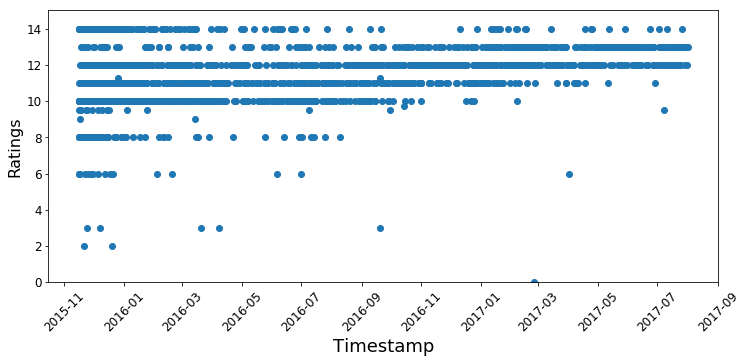

In [118]:
fig = plt.figure(figsize=(12,5))
plt.scatter(data = df_final, x = 'timestamp', y = 'rating_numerator' )
plt.ylim(0,15)
plt.xlabel('Timestamp', fontsize=18)
plt.xticks(rotation = 45, fontsize = 12)
plt.ylabel('Ratings', fontsize=16)
plt.yticks( fontsize = 12);
plt.savefig('ratings_over_time.png', dpi = 300, bbox_inches='tight')

__Insight__

Based on the plot we see most of the ratings are over 10, however since 2016/11 nearly all of the ratings are >10, which was not the case before. 
<br>
<br>

### Retweets and Favorites over time

I use scatter plots to look at these relationships

(0, 15000)

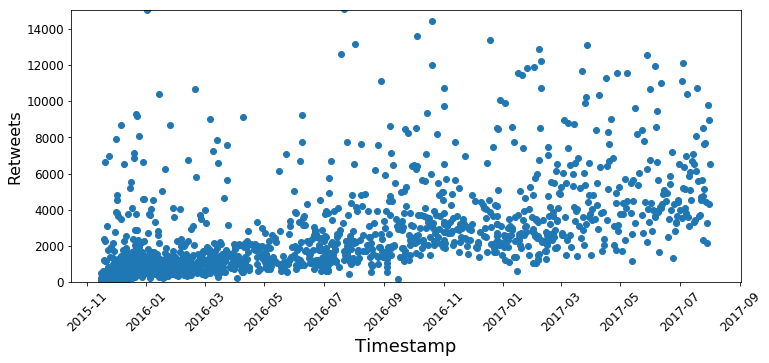

In [119]:
fig = plt.figure(figsize=(12,5))
plt.scatter(data = df_final, x = 'timestamp', y = 'retweet_count' );
#plt.ylim(0,15)
plt.xlabel('Timestamp', fontsize=18)
plt.xticks(rotation = 45, fontsize = 12)
plt.ylabel('Retweets', fontsize=16)
plt.yticks( fontsize = 12);
#set y limits to exclude outliers
plt.ylim(0,15000)

(0, 40000)

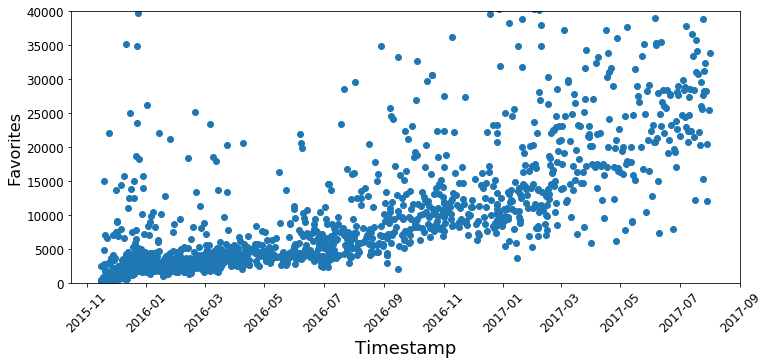

In [120]:
fig = plt.figure(figsize=(12,5))
plt.scatter(data = df_final, x = 'timestamp', y = 'favorite_count' );
plt.xlabel('Timestamp', fontsize=18)
plt.xticks(rotation = 45, fontsize = 12)
plt.ylabel('Favorites', fontsize=16)
plt.yticks( fontsize = 12);
#set y limits to exclude outliers
plt.ylim(0,40000)

__Insight__ 

In both cases, once we get rid of the outliers, we see that there is a positive correlation between the retweets vs time, and favorite vs time. 

This is possible due to the increase in popularity of the twitter handle. It will be interesting to see the number of followers over time also. 

<br>

### Retweets vs Favorites

Since both have a linear relationship with time, we expect to see a linear relationship

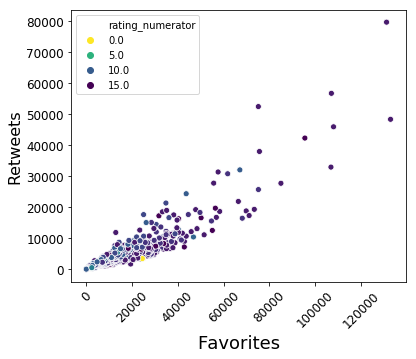

In [121]:
fig = plt.figure(figsize=(6,5))
sns.scatterplot(data = df_final, x = 'favorite_count', y = 'retweet_count',  hue = 'rating_numerator',palette = "viridis_r" );
plt.xlabel('Favorites', fontsize=18)
plt.xticks(rotation = 45, fontsize = 12)
plt.ylabel('Retweets', fontsize=16)
plt.yticks( fontsize = 12);
plt.savefig('retweets vs favorites.png',dpi = 300, bbox_inches='tight')

__Insight__

As predicted, there is a linear relationship. I also used seaborn hue to color based on the ratings, and we find the higher ratings do coincide with higher retweets and favorites
<br>
<br>

### Rating counts 

Here I look at which are the most frequent ratings

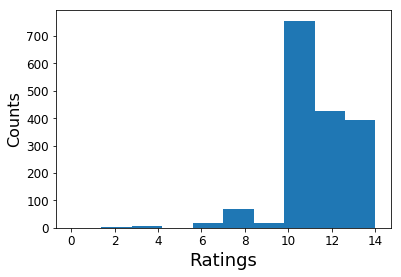

In [122]:
plt.hist(data = df_final, x = 'rating_numerator', color = sns.color_palette()[0])
plt.xlabel('Ratings', fontsize=18)
plt.xticks(fontsize = 12)
plt.ylabel('Counts', fontsize=16)
plt.yticks( fontsize = 12);
plt.savefig('ratings_hist.png',dpi = 300, bbox_inches='tight')

__Insight__ 

Based on the plot, most ratings are >10, with the highest number around 10-12. 

### Dog stages

Here I look at which dog stages are most popular. 

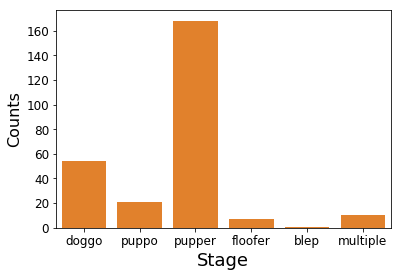

In [123]:
sns.countplot(data = df_final, x = 'stage', color = sns.color_palette()[1]);
plt.xlabel('Stage', fontsize=18)
plt.xticks(fontsize = 12)
plt.ylabel('Counts', fontsize=16)
plt.yticks( fontsize = 12);
plt.savefig('stages_count.png', dpi = 300, bbox_inches='tight')

__Insight__

A seaborn count plot is used.
Pupper is the most common stage, with blep being the least common. 
<br>
<br>

### Most common dog species

Since there are several dog species, I use a word cloud to look at which species are most popular

In [124]:
#take only the values from dog_species column
words = df_final['dog_species']

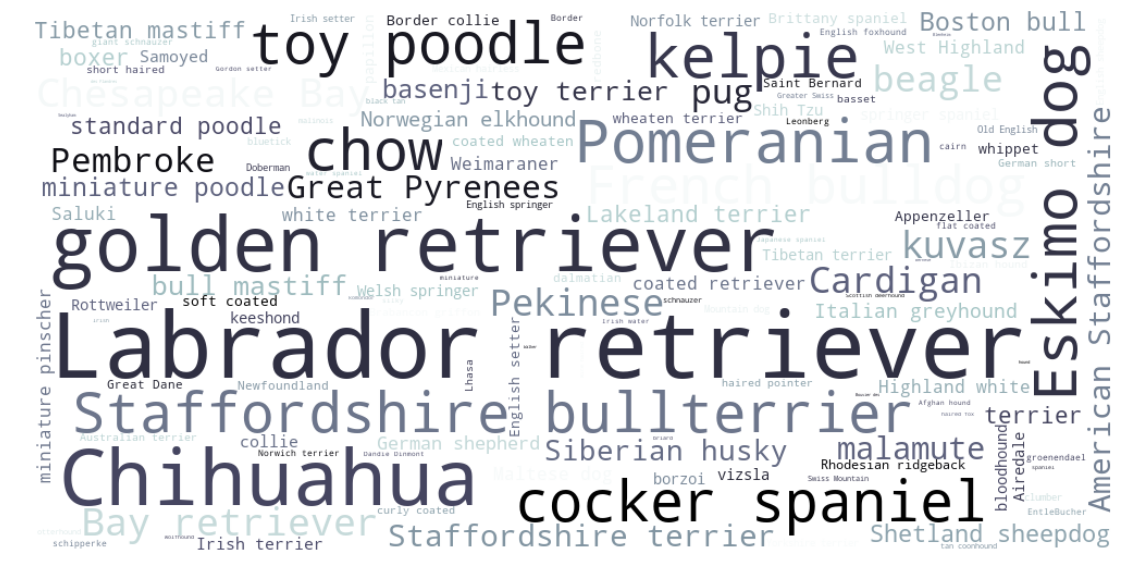

In [125]:
#Word cloud works with a string, so put all the names in a string
unique_string=(" ").join(words)
#remove the underscore from the names 
unique_string = unique_string.replace("_"," ")

#Make the word cloud
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',colormap = 'bone', stopwords = STOPWORDS).generate(str(unique_string));

#plot it 
fig = plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()
wordcloud.to_file("breed.png")


__Insight__

Labrador Retriver, Chihuahua and Golden Retriver are the most popular dogs. 
<br>
<br>

### Dog Names

I also use a word cloud for dog names 

In [126]:
#Isolate the dog names from the dataframe
word_name = df_final['name']

In [127]:
#drop the nan from the names 
word_name = [x for x in word_name if str(x) != 'nan']

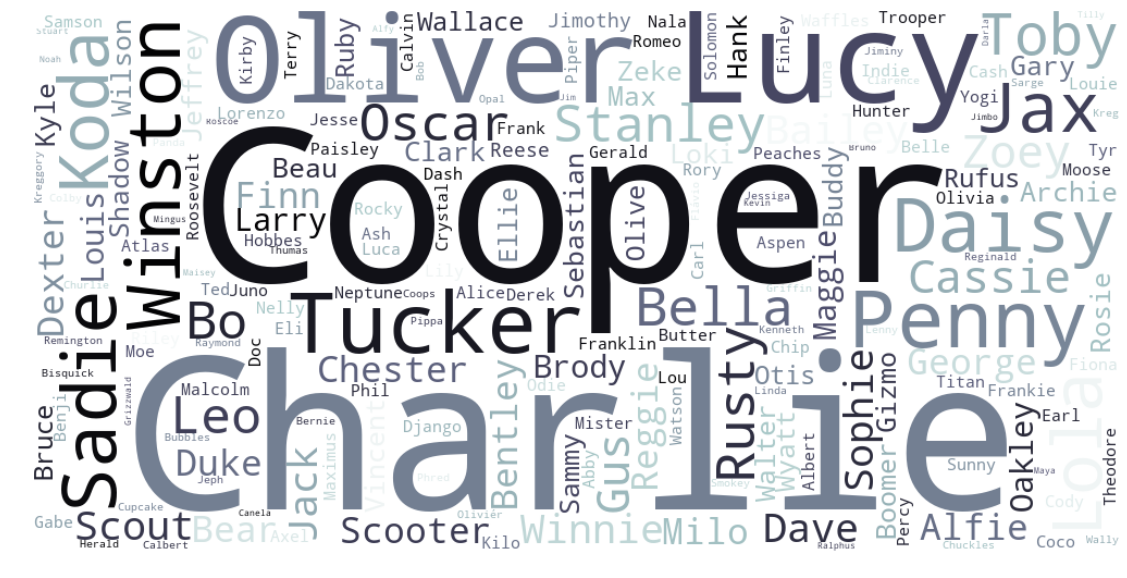

In [128]:
unique_string_2=(" ").join(word_name)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',colormap = 'bone', stopwords = STOPWORDS).generate(str(unique_string_2));

fig = plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()
wordcloud.to_file("name.png")


__Insight__

Charlie and Cooper seem to be the most popular names 

## References

pandas extract string
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

Python regular expression
https://docs.python.org/3/library/re.html

Removing elements from a list
https://stackoverflow.com/questions/4211209/remove-all-the-elements-that-occur-in-one-list-from-another

python Regex: 
https://www.guru99.com/python-regular-expressions-complete-tutorial.html